In [1]:
import matplotlib
matplotlib.use('TKAgg')
%load_ext autoreload
%autoreload 2
# %matplotlib ipympl
from pianoq.misc.mplc_writeup_imports import *
dir_path = r'G:\My Drive\Projects\MPLC\results\lab\2024_10_30_make_mirror_work'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Transformations after new alignment 
When I did the HG measurements I also fixed a bit the alignment, and that was probably a good thing to do after 3 months. Coming back to measure correlations, and used a dead_zone=450um, and linear tilt on plane 10 of 35 pixels per 2pi, and now of course with the new mask locations, and I get pretty nice looking correlations! 

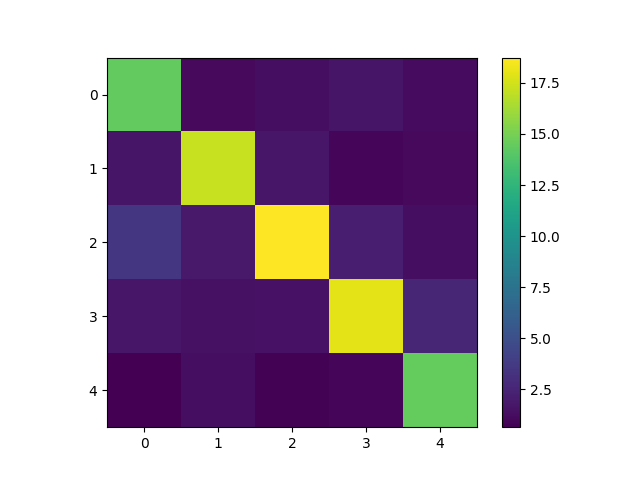

In [2]:
r = DiscreetScanResult(rf'{dir_path}\2024_10_31_11_59_45.dscan')
r.show(figshow=False)

Notice that the counts are significantly highe than what they used to be, by a factor of ~2-2.5! (I theoretically expected 4X, but this is not bad at all too.) 

The single counts looked a bit crooked (dz10=8), so now that the masks are aligned I thought maybe I should look again for the dz10...  

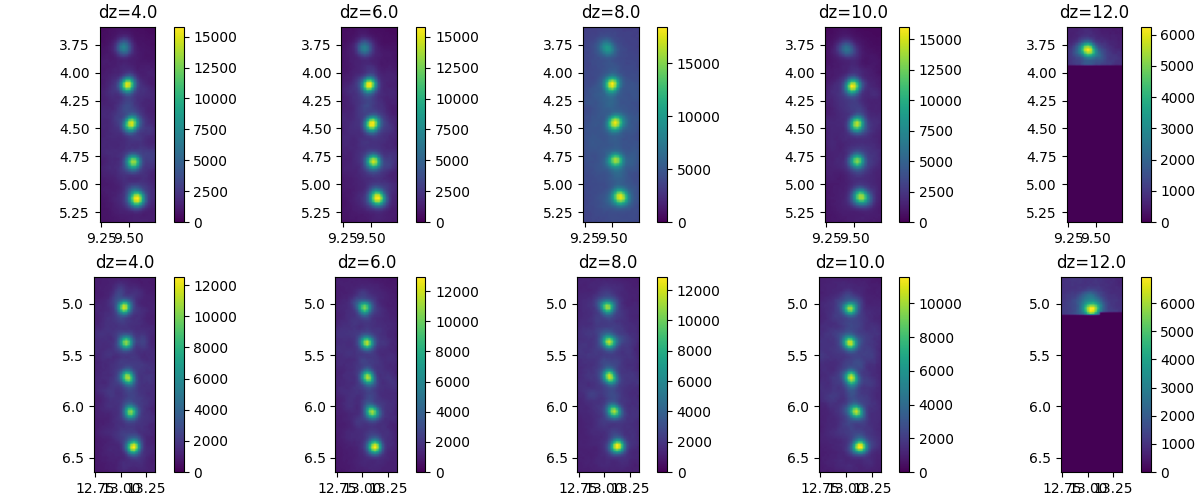

In [3]:
plt.close('all')
idl_paths = glob.glob(rf'{dir_path}\*fine*idler*.scan')
sig_paths = glob.glob(rf'{dir_path}\*fine*signal*.scan')

sig_ds = np.array([re.findall('.*dz10_(.*)mm.*.scan', path)[0] for path in sig_paths]).astype(float)
sig_ds, sig_paths = zip(*sorted(zip(sig_ds, sig_paths)))
# sig_ds, paths = sig_ds[1:], paths[1:]
sig_scans = [ScanResult(path) for path in sig_paths]

idl_ds = np.array([re.findall('.*dz10_(.*)mm.*.scan', path)[0] for path in idl_paths]).astype(float)
idl_ds, idl_paths = zip(*sorted(zip(idl_ds, idl_paths)))
# idl_ds, paths = idl_ds[1:], paths[1:]
idl_scans = [ScanResult(path) for path in idl_paths]

fig, axes = plt.subplots(2, len(idl_scans), figsize=(12, 5), constrained_layout=True)
for i in range(len(idl_scans)):
    sig = sig_scans[i]
    idl = idl_scans[i]
    # my_mesh(idl.X, idl.Y, idl.single1s, ax=axes[0, i], clim=[0, 21e3])
    my_mesh(idl.X, idl.Y, idl.single1s, ax=axes[0, i], clim=[0, None])
    # my_mesh(sig.X, sig.Y, sig.single2s, ax=axes[1, i], clim=[0, 15.5e3])
    my_mesh(sig.X, sig.Y, sig.single2s, ax=axes[1, i], clim=[0, None])
    axes[0, i].set_title(f'dz={idl_ds[i]}')
    axes[1, i].set_title(f'dz={sig_ds[i]}')

Let's choose dz10=5mm, I don't think I will really find a very good dz10, and I had enough :P 

But - maybe a good thing to try is to do column-to-row instead of row-to-column, so I won't have trouble with the innermost spots. (See here the top spots in the top pictures, which is significantly dimmer.) I will try this since it is a good thing to try, though this causes a bit of trouble to have the 5 spots at the end a s a row, because the masks are tall more than wide. So it might not be perfect, and the best is with the D-mirror, I will get there at some point... If col_to_row won't fix it well, I am pretty sure I can have a significantly larger tilt at plane10, and it will be good enough... 

So bottom line:
- now the mirror still bothers (upper spot in upper panel)
- D-mirror will probably be the best final solution 
- col_to_row I will try on Sunday, and it might work pretty well (but it may have some problems, masks are taller than wide)
- adding more tilt on plane10 can probably also bring me almost all the way 

# Column to row
So I tried col2row, such that all spots are supposed to be far from the mirror edge. Here are the single counts: 

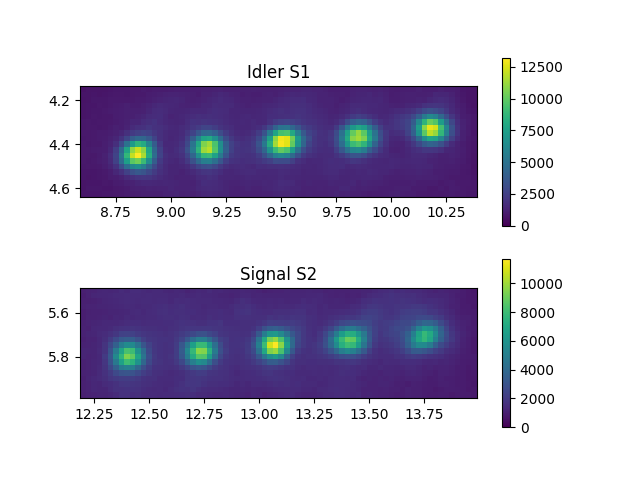

In [11]:
locs_signal_path = fr'{dir_path}\{tnow()}_s2_sig.locs'
locs_idler_path = fr'{dir_path}\{tnow()}_s1_idl.locs'

res_idl = ScanResult(fr'{dir_path}\2024_11_03_09_29_12_5spots_fine_idler_dead_zone_450um_dz10_5mm_p10_tilts_35_c2r.scan')
res_sig = ScanResult(fr'{dir_path}\2024_11_03_09_29_10_5spots_fine_signal_dead_zone_450um_dz10_5mm_p10_tilts_35_c2r.scan')

fig, axes = plt.subplots(2, 1)
my_mesh(res_idl.X, res_idl.Y, res_idl.single1s, ax=axes[0], clim=[0, None], title='Idler S1')
my_mesh(res_sig.X, res_sig.Y, res_sig.single2s, ax=axes[1], clim=[0, None], title='Signal S2')

# res_idl.get_xys(1, saveto_path=locs_idler_path)
# res_sig.get_xys(2, saveto_path=locs_signal_path)

Which seem pretty nice, but less counts than with the regular row to col, which was pretty much expected from the geometry of the masks (which are taller rather than wider.) I will still find phases and look at correlations for completeness. Indeed the correlations are less good than what I had with the good ol' row to col.

In [ ]:
r = DiscreetScanResult(r"G:\My Drive\Projects\MPLC\results\lab\2024_10_30_make_mirror_work\2024_11_03_12_05_29.dscan")
r.show(figshow=False)

## plane 10 tilts 
So let's see how much tilt will be enough 

In [13]:
plt.close('all')

sig_paths = []
idl_paths = []
sig_tilts = [35, 30, 25, 20, 15, 12, 10, 8]
idl_tilts = [35, 30, 25, 20, 15, 12, 10, 8]
for t in sig_tilts:
    sig_paths.append(glob.glob(rf'{dir_path}\*fine*signal*pl10tilt_{t}_fine.scan')[0])
    idl_paths.append(glob.glob(rf'{dir_path}\*fine*idler*pl10tilt_{t}_fine.scan')[0])

sig_scans = [ScanResult(path) for path in sig_paths]
idl_scans = [ScanResult(path) for path in idl_paths]

all_idl_amps = []
all_sig_amps = []

fig, axes = plt.subplots(2, len(idl_scans), figsize=(12, 5), constrained_layout=True)
for i in range(len(idl_scans)):
    sig = sig_scans[i]
    idl = idl_scans[i]
    my_mesh(idl.X, idl.Y, idl.single1s, ax=axes[0, i], clim=[0, 15e3])
    # my_mesh(idl.X, idl.Y, idl.single1s, ax=axes[0, i], clim=[0, None])
    my_mesh(sig.X, sig.Y, sig.single2s, ax=axes[1, i], clim=[0, 12.5e3])
    # my_mesh(sig.X, sig.Y, sig.single2s, ax=axes[1, i], clim=[0, None])
    idl_amps = detect_gaussian_spots_subpixel(idl.single1s, idl.X, idl.Y[::-1], get_amps=True)
    all_idl_amps.append(idl_amps)
    sig_amps = detect_gaussian_spots_subpixel(sig.single2s, sig.X, sig.Y[::-1], get_amps=True)
    all_sig_amps.append(sig_amps)
    axes[0, i].set_title(f'tilt={sig_tilts[i]}')
    axes[1, i].set_title(f'tilt={sig_tilts[i]}')
    idl_amps = np.round(idl_amps/1000, 1)
    sig_amps = np.round(sig_amps/1000, 1)
    axes[0, i].set_ylabel(f'amps={idl_amps}', size=9)
    axes[1, i].set_ylabel(f'amps={sig_amps}', size=9)

fig.show()

all_idl_amps = np.array(all_idl_amps)
all_sig_amps = np.array(all_sig_amps)

In [14]:
fig, axes = plt.subplots(1, 2)
for i in range(5):  # 5 spots 
    axes[0].plot(idl_tilts, all_idl_amps[:, i] , '*--', label=f'spot_no={i}')
    axes[1].plot(sig_tilts, all_sig_amps[:, i] , '*--', label=f'spot_no={i}')

for ax in axes:
    ax.legend()
    ax.set_xlabel('pix/2*pi in plane 10')
    ax.set_ylabel('amp of spot')
fig.show()

In [15]:
plt.show(block=True)

In [4]:
from pianoq.misc.misc import get_locs_from_scan
plt.close('all')

sig_paths = []
idl_paths = []

tilts = [35, 30, 25, 20, 15, 12, 10, 8]
for t in tilts:
    sig_paths.append(glob.glob(rf'{dir_path}\*fine*signal*pl10tilt_{t}_fine.scan')[0])
    idl_paths.append(glob.glob(rf'{dir_path}\*fine*idler*pl10tilt_{t}_fine.scan')[0])

for sig, idl in zip(sig_paths, idl_paths):
    get_locs_from_scan(idl, single_num=1, show=True)
    get_locs_from_scan(sig, single_num=2, show=True)

Show correlations 

In [16]:
# paths = glob.glob(rf'{dir_path}\2024_11_05*p10tilt*.dscan')
paths = glob.glob(rf'{dir_path}\2024_11_06*p10tilt*new_phases.dscan')
tilts = np.array([re.findall('.*p10tilt_(.*)_new_phases.dscan', path)[0] for path in paths]).astype(float)
scans = [DiscreetScanResult(path) for path in paths]
for i in range(len(paths)):
    fig, axes = plt.subplots(1, 3, constrained_layout=True)
    imm = axes[0].imshow(scans[i].coincidences)
    fig.colorbar(imm, ax=axes[0])

    imm = axes[1].imshow(scans[i].single1s)
    fig.colorbar(imm, ax=axes[1])

    imm = axes[2].imshow(scans[i].single2s)
    fig.colorbar(imm, ax=axes[2])
    
    fig.suptitle(f'tilt={tilts[i]}')
    fig.show()